In [2]:

import tensorflow as tf
from tensorflow import keras

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


     -------------------------------------- 276.5/276.5 MB 6.1 MB/s eta 0:00:00
     ------------------------------------- 430.5/430.5 kB 28.0 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 16.4 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 22.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 17.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.3 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 19.9 MB/s eta 0:00:00
     ------------------------------------- 181.8/18

In [2]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

In [3]:
import imageProcessing

In [4]:
dataset = keras.datasets.mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [6]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

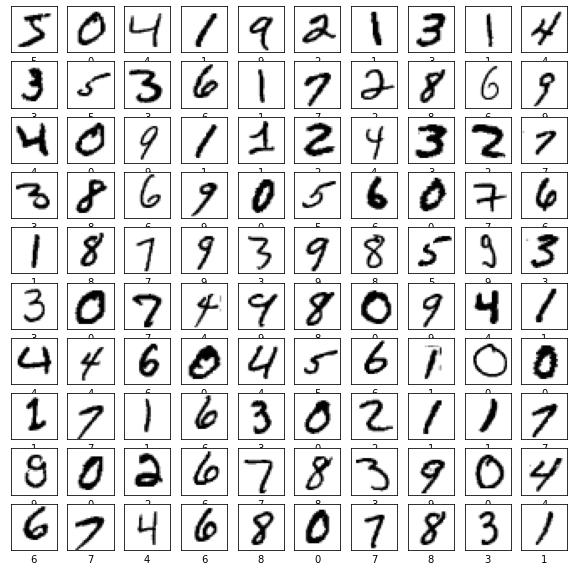

In [8]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), 
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.2585 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.1161 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.0796 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.0610 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.0462 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 1s 612us/step - loss: 0.0368 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 1s 623us/step - loss: 0.0291 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.0251 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 1s 619us/step - loss: 0.0193 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 1s 622u

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

313/313 [==============================] - 0s 450us/step - loss: 0.0859 - accuracy: 0.9761
Test accuracy 0.9761000275611877


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([3.6351334e-12, 2.7252376e-13, 1.0944441e-08, 1.1478627e-06,
       1.2299731e-14, 4.6458121e-10, 3.2710033e-20, 9.9999869e-01,
       1.2784040e-10, 6.6158080e-08], dtype=float32)

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array), 
                                         class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [16]:
print(type(test_images))

<class 'numpy.ndarray'>


In [17]:
print(test_images.shape)

(10000, 28, 28)


In [18]:
list = []

float64 (28, 28) <class 'numpy.ndarray'>


/home/amrutheshwaro/Desktop/DIPProject/imageProcessing.py:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  imgGray2 = rgb2gray(characterCropped)


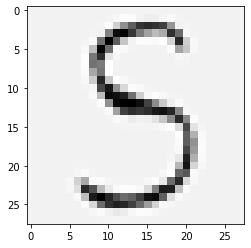

In [19]:
list.append(imageProcessing.preProcessing("s.jpeg"))

float64 (28, 28) <class 'numpy.ndarray'>


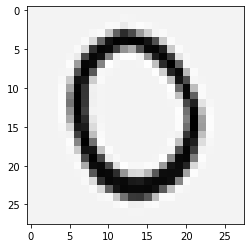

In [20]:
list.append(imageProcessing.preProcessing("0.jpeg"))

In [21]:
ImageTest = []

In [22]:
ImageTest = np.asarray(list)

In [23]:
ImageLabels = [5, 0]

In [24]:
ImagePredict = model.predict(ImageTest)

In [25]:
ImagePredict[0]

array([1.4551526e-07, 3.5479557e-02, 1.8652020e-07, 1.3111676e-01,
       3.0493947e-08, 8.3199680e-01, 1.3119539e-03, 2.5832485e-06,
       4.1403699e-05, 5.0490013e-05], dtype=float32)

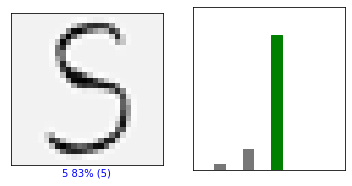

In [26]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, ImagePredict, ImageLabels, ImageTest)
plt.subplot(1, 2, 2)
plot_value_array(i, ImagePredict, ImageLabels)
plt.show()

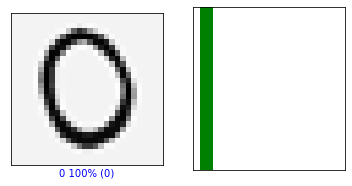

In [27]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, ImagePredict, ImageLabels, ImageTest)
plt.subplot(1, 2, 2)
plot_value_array(i, ImagePredict, ImageLabels)
plt.show()